<a href="https://colab.research.google.com/github/Engenery/Driver_Control_Deep_Learning/blob/main/Pose_detection_to_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/misbah4064/human-pose-estimation-opencv.git
%cd human-pose-estimation-opencv/

Cloning into 'human-pose-estimation-opencv'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/human-pose-estimation-opencv


In [39]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.15
def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)
        print(points)
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame,points

[(125, 51)]
[(125, 51), (101, 87)]
[(125, 51), (101, 87), (71, 87)]
[(125, 51), (101, 87), (71, 87), (53, 143)]
[(125, 51), (101, 87), (71, 87), (53, 143), None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87)]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111)]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127)]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None, None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None, None, None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None, None, None, None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None, None, None, None, None]
[(125, 51), (101, 87), (71, 87), (53, 143), None, (131, 87), (155, 111), (191, 127), None, None, None, N

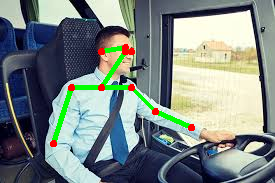

In [48]:
input = cv.imread('a.jpg')
output, p = poseDetector(input)
cv2_imshow(output)

In [56]:
point_rshoulder=p[2]
p_srx=point_rshoulder[0]
p_sry=point_rshoulder[1]
if p_srx>65 and p_srx<100 and p_sry>80 and p_sry<100:
 print("Correcta posición del hombro derecho")
else:
 print("corrija la posición de su hombro derecho")
point_lshoulder=p[5]
p_slx=point_lshoulder[0]
p_sly=point_lshoulder[1]
if p_slx>125 and p_slx<160 and p_sly>80 and p_sly<100:
 print("Correcta posición del hombro izquierdo")
else:
 print("corrija la posición de su hombro izquierdo")
point_relbow=p[3]
p_erx=point_relbow[0]
p_ery=point_relbow[1]
if p_erx>45 and p_erx<90 and p_ery>135 and p_ery<150:
 print("Correcta posición del codo derecho")
else:
 print("corrija la posición de su codo derecho") 
point_lelbow=p[6]
p_elx=point_lelbow[0]
p_ely=point_lelbow[1]
if p_elx>145 and p_elx<165 and p_ely>100 and p_ely<125:
 print("Correcta posición del codo izquierdo")
else:
 print("corrija la posición de su codo izquierdo") 

Correcta posición del hombro derecho
Correcta posición del hombro izquierdo
Correcta posición del codo derecho
Correcta posición del codo izquierdo


[(125, 63)]
[(125, 63), (119, 95)]
[(125, 63), (119, 95), (95, 99)]
[(125, 63), (119, 95), (95, 99), (83, 135)]
[(125, 63), (119, 95), (95, 99), (83, 135), None]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95)]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111)]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115)]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None, None]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None, None, None]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None, None, None, (137, 155)]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None, None, None, (137, 155), None]
[(125, 63), (119, 95), (95, 99), (83, 135), None, (149, 95), (179, 111), (209, 115), None, N

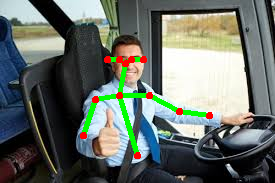

In [62]:
input = cv.imread('b.jpg')
output, p = poseDetector(input)
cv2_imshow(output)

In [65]:
point_rshoulder=p[2]
p_srx=point_rshoulder[0]
p_sry=point_rshoulder[1]
if p_srx>60 and p_srx<90 and p_sry>80 and p_sry<100:
 print("Correcta posición del hombro derecho")
else:
 print("corrija la posición de su hombro derecho")
point_lshoulder=p[5]
p_slx=point_lshoulder[0]
p_sly=point_lshoulder[1]
if p_slx>125 and p_slx<140 and p_sly>80 and p_sly<100:
 print("Correcta posición del hombro izquierdo")
else:
 print("corrija la posición de su hombro izquierdo")
point_relbow=p[3]
p_erx=point_relbow[0]
p_ery=point_relbow[1]
if p_erx>45 and p_erx<60 and p_ery>130 and p_ery<150:
 print("Correcta posición del codo derecho")
else:
 print("corrija la posición de su codo derecho") 
point_lelbow=p[6]
p_elx=point_lelbow[0]
p_ely=point_lelbow[1]
if p_elx>145 and p_elx<165 and p_ely>100 and p_ely<125:
 print("Correcta posición del codo izquierdo")
else:
 print("corrija la posición de su codo izquierdo") 

corrija la posición de su hombro derecho
corrija la posición de su hombro izquierdo
corrija la posición de su codo derecho
corrija la posición de su codo izquierdo


In [66]:
point_rshoulder=p[2]
p_srx=point_rshoulder[0]
p_sry=point_rshoulder[1]
if p_srx>65 and p_srx<100 and p_sry>80 and p_sry<100:
 print("Correcta posición del hombro derecho")
else:
 print("corrija la posición de su hombro derecho")
point_lshoulder=p[5]
p_slx=point_lshoulder[0]
p_sly=point_lshoulder[1]
if p_slx>125 and p_slx<160 and p_sly>80 and p_sly<100:
 print("Correcta posición del hombro izquierdo")
else:
 print("corrija la posición de su hombro izquierdo")
point_relbow=p[3]
p_erx=point_relbow[0]
p_ery=point_relbow[1]
if p_erx>45 and p_erx<90 and p_ery>130 and p_ery<150:
 print("Correcta posición del codo derecho")
else:
 print("corrija la posición de su codo derecho") 
point_lelbow=p[6]
p_elx=point_lelbow[0]
p_ely=point_lelbow[1]
if p_elx>145 and p_elx<165 and p_ely>100 and p_ely<125:
 print("Correcta posición del codo izquierdo")
else:
 print("corrija la posición de su codo izquierdo") 

Correcta posición del hombro derecho
Correcta posición del hombro izquierdo
Correcta posición del codo derecho
corrija la posición de su codo izquierdo
